<a href="https://colab.research.google.com/github/gvxfnv/lizavavilova/blob/main/%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Локальный репозиторий

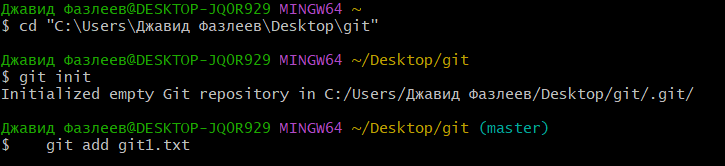

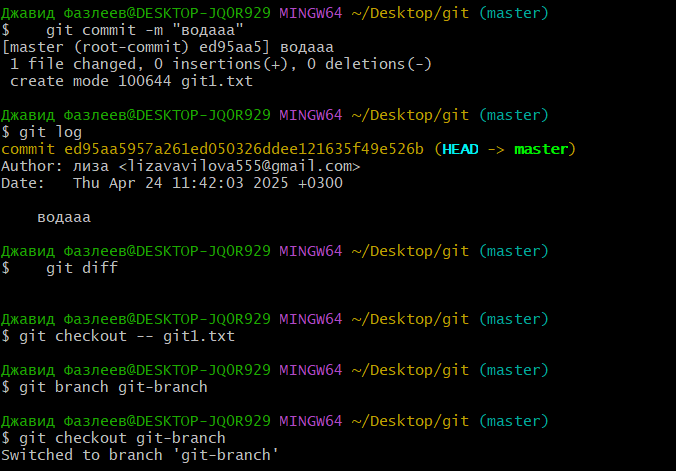

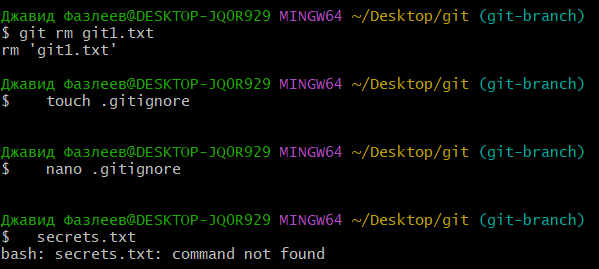

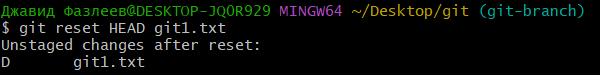

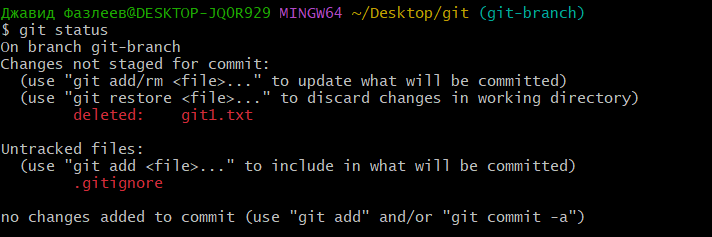

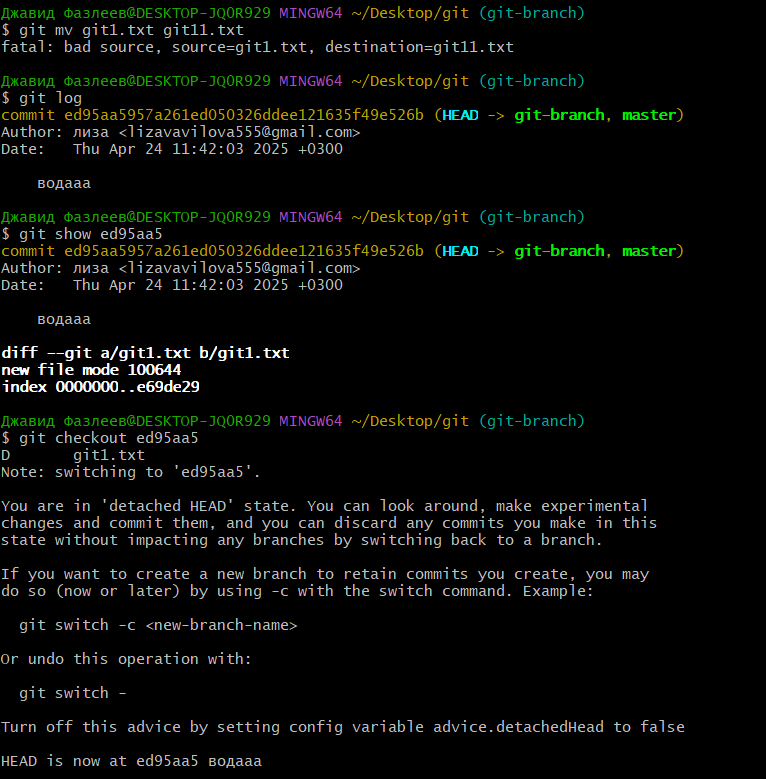

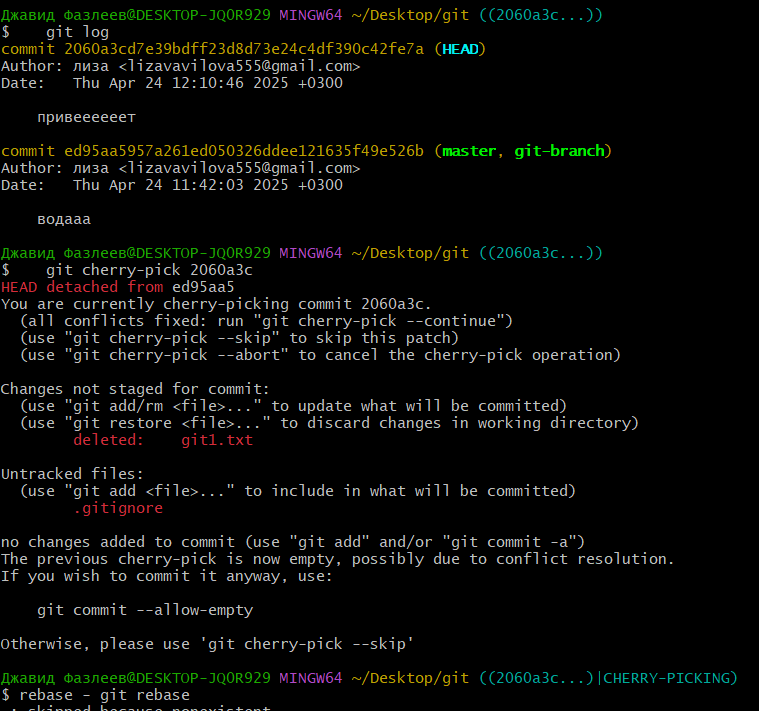

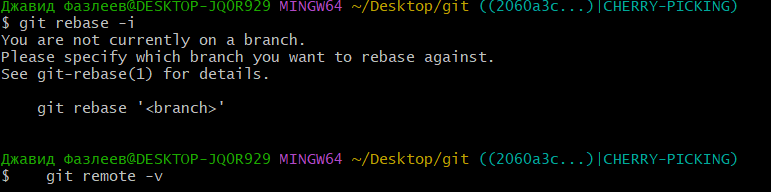

Удаленный репозиторий


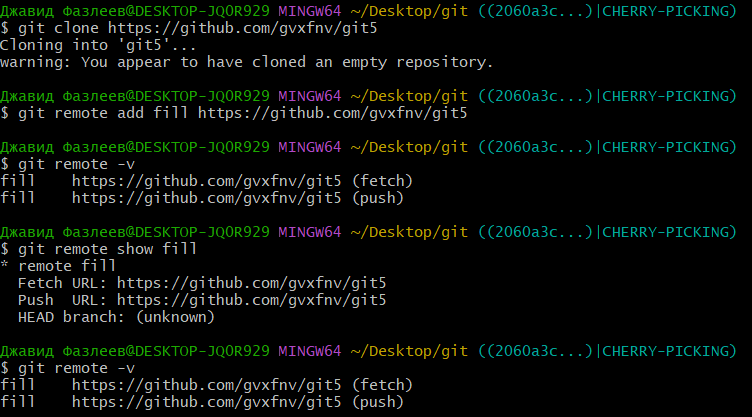

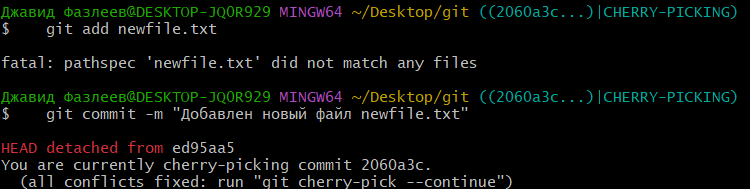